# Embeddings Cluster — Task 3 

This notebook is written from scratch to follow Task 3 instructions.
The goal is to clearly separate logic into functions and explain
why each step exists, including assumptions and failure cases.


In [1]:
def generate_sentences(n=100):
    """
    This function exists to create input data for the pipeline.
    Clustering cannot work without sentences, so this step prepares
    sample text data in a controlled way.
    """
    sentences = []
    for i in range(1, n + 1):
        sentences.append(f"This is sample sentence number {i}")
    return sentences

In [2]:
import numpy as np

def create_embeddings(sentences, dim=10):
    """
    This function exists to convert text sentences into numeric form.
    Clustering algorithms cannot work on text, so embeddings are required.
    Here we use mock embeddings to test the pipeline logic.
    """
    # Assumption: sentences is a non-empty list of strings
    # Failure case: if sentences is empty or not text, downstream steps will fail

    if not sentences:
        raise ValueError("Sentences list is empty")

    embeddings = np.random.rand(len(sentences), dim)
    return embeddings


In [3]:
from sklearn.cluster import KMeans

def cluster_embeddings(embeddings, k=3):
    """
    This function exists to group similar embeddings together.
    Clustering helps organize the data into meaningful groups
    instead of leaving it unstructured.
    """
    # Assumption: embeddings is a 2D numeric array
    # Failure case: wrong shape or non-numeric values will cause KMeans to fail

    if len(embeddings) == 0:
        raise ValueError("Embeddings array is empty")

    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(embeddings)
    return labels


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_clusters(embeddings, labels):
    """
    This function exists to visualize high-dimensional embeddings.
    PCA reduces the data to 2D so humans can see cluster separation.
    This step does not affect clustering results.
    """
    # Assumption: embeddings and labels have matching lengths
    # Failure case: mismatch will cause plotting errors

    if len(embeddings) != len(labels):
        raise ValueError("Embeddings and labels size mismatch")

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels)
    plt.title("Embedding Clusters (PCA View)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


In [5]:
import json
import os

def save_outputs(sentences, embeddings, labels, output_dir="output"):
    """
    This function exists to save the results of the pipeline.
    Saving outputs helps to reuse results and avoids recomputation.
    """
    # Assumption: output directory is writable
    # Failure case: missing permissions or invalid paths will cause save errors

    os.makedirs(output_dir, exist_ok=True)

    # Save sentences
    with open(os.path.join(output_dir, "sentences.json"), "w") as f:
        json.dump(sentences, f)

    # Save embeddings
    np.save(os.path.join(output_dir, "embeddings.npy"), embeddings)

    # Save labels
    with open(os.path.join(output_dir, "labels.json"), "w") as f:
        json.dump(labels.tolist(), f)


In [6]:
def pick_representatives(sentences, labels):
    """
    This function exists to select one representative sentence
    from each cluster so the cluster can be understood easily.
    """
    # Assumption: number of sentences matches number of labels
    # Failure case: mismatch will give wrong or missing representatives

    representatives = {}

    for idx, label in enumerate(labels):
        if label not in representatives:
            representatives[int(label)] = sentences[idx]

    return representatives


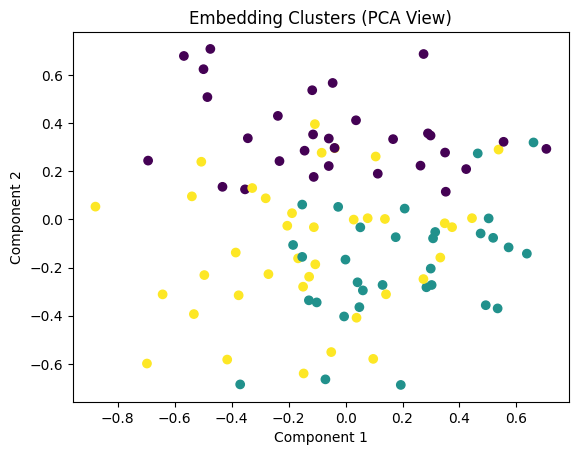

{1: 'This is sample sentence number 1',
 2: 'This is sample sentence number 3',
 0: 'This is sample sentence number 4'}

In [7]:
# Main execution flow

sentences = generate_sentences()
embeddings = create_embeddings(sentences)
labels = cluster_embeddings(embeddings)
representatives = pick_representatives(sentences, labels)

visualize_clusters(embeddings, labels)
save_outputs(sentences, embeddings, labels)

representatives


## If this breaks, what could be the reason?

- The sentences list is empty or not in correct format.
- The number of embeddings does not match the number of sentences.
- Embeddings are not numeric or have wrong shape.
- The value of k is larger than the number of sentences.
- Required libraries are not installed.
- Output directory is not writable.

